Enter the name of the person: Nishtha
Saved 1 pictures


Saved 2 pictures


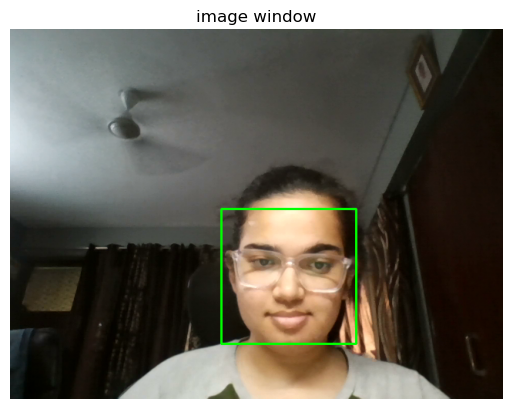

Saved 3 pictures


Saved 4 pictures


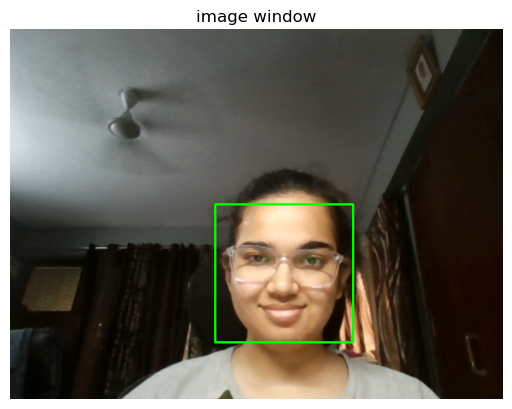

Saved 5 pictures


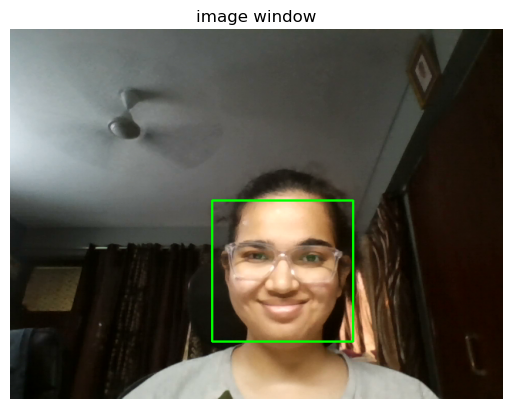

Saved 6 pictures


Saved 7 pictures


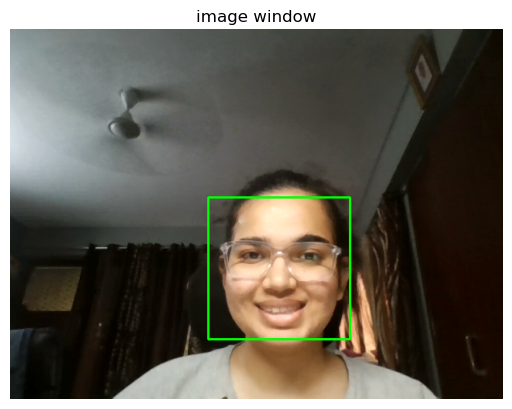

Saved 8 pictures


Saved 9 pictures


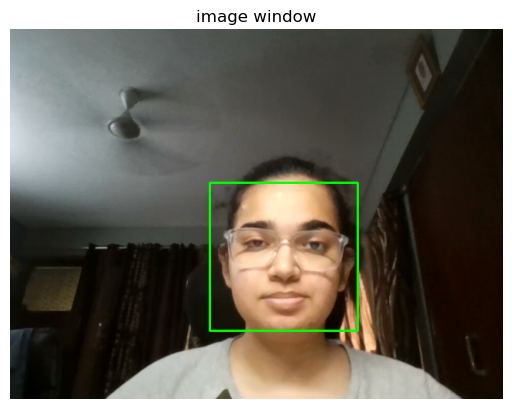

Saved 10 pictures


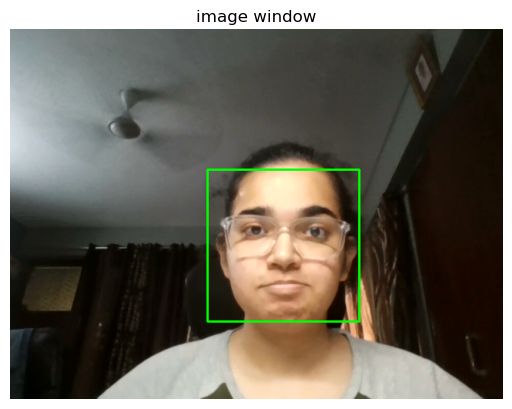

Saved 11 pictures


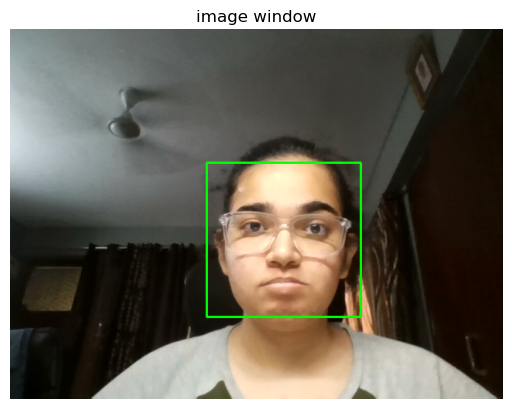

Saved 12 pictures


Saved 13 pictures


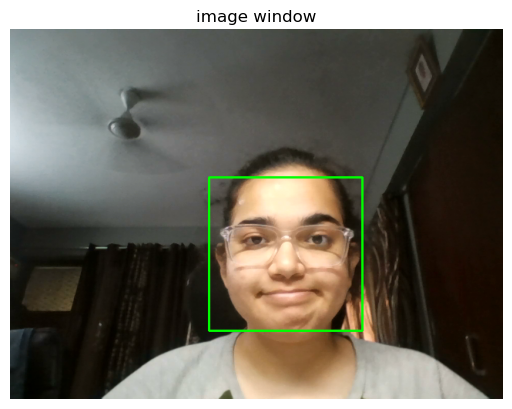

Saved 14 pictures


Saved 15 pictures


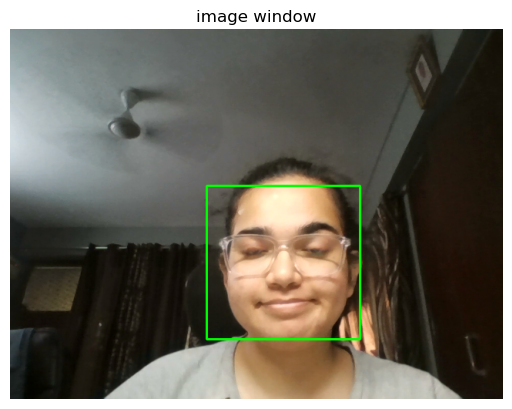

Saved 16 pictures


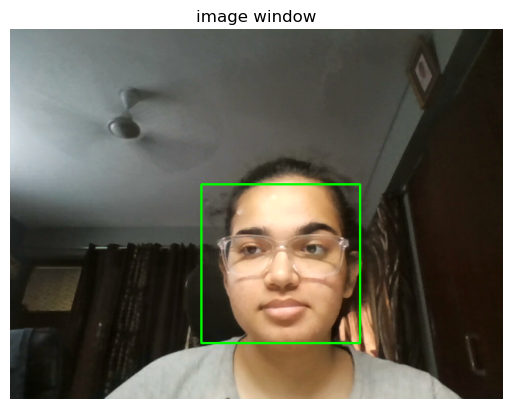

Saved 17 pictures


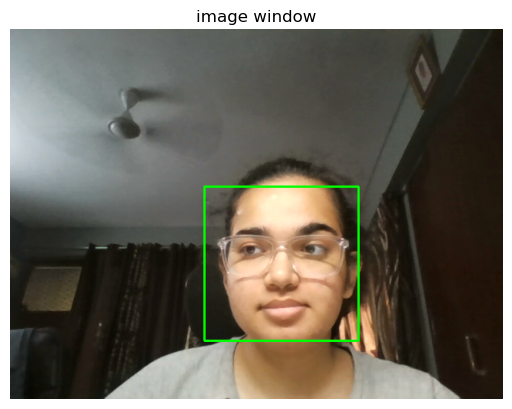

Saved 18 pictures


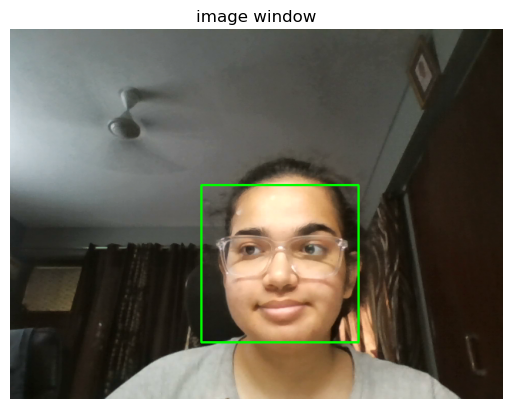

Saved 19 pictures


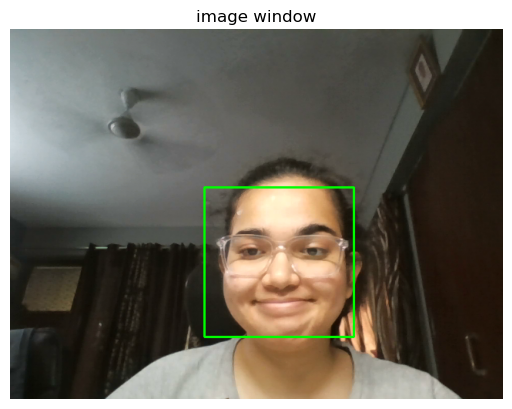

Saved 20 pictures


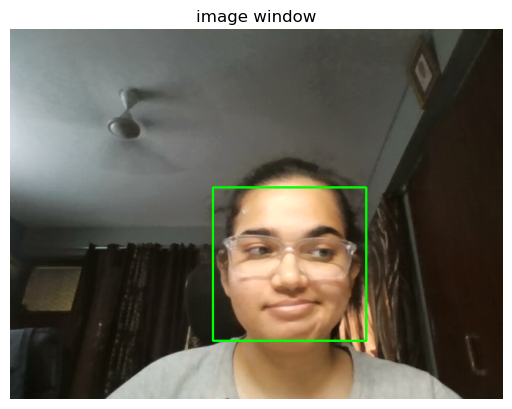

Data saved successfully at: ./datacollect\Nishtha.npy


In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Click 20 pictures of the person
cam = cv2.VideoCapture(0)
fileName = input("Enter the name of the person: ")
dataset_path = "./datacollect"
if not os.path.exists(dataset_path):
    os.makedirs(dataset_path)

model = cv2.CascadeClassifier("C:\\Users\\Nishtha\\Downloads\\haarcascade_frontalface_alt.xml")

# Create a list to save face data
faceData = []
count = 0

while count < 20:
    success, img = cam.read()
    if not success:
        print("Reading camera failed!")

    grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = model.detectMultiScale(img, 1.3, 5)

    # Pick the largest face and save it
    if len(faces) > 0:
        f = faces[-1]  # Pick the largest face
        x, y, w, h = f
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        # Crop and save the largest face
        cropped_face = cv2.resize(grayImg[y:y + h, x:x + w], (100, 100))
        faceData.append(cropped_face)
        count += 1
        print(f"Saved {count} pictures")

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("image window")
    plt.axis("off")
    plt.show()
    plt.pause(0.001)

# Convert faceData to numpy array and save it on disk
faceData = np.asarray(faceData)
faceData = faceData.reshape((len(faceData), 100, 100))

filepath = os.path.join(dataset_path, fileName + ".npy")
np.save(filepath, faceData)
print("Data saved successfully at: " + filepath)

cam.release()
plt.close()
